In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [194]:
df = pd.read_excel('Automobile_data.xlsx')

In [195]:
df['Wheelbase'].value_counts()

2450 mm    58
2425 mm    48
2700 mm    32
2470 mm    29
2600 mm    29
           ..
2791 mm     1
2790 mm     1
2579 mm     1
2720 mm     1
2525 mm     1
Name: Wheelbase, Length: 69, dtype: int64

In [196]:
df['Wheelbase__mm'] = df['Wheelbase'].str.extract(r'(\d+)').astype('float')

In [197]:
df['Wheelbase__mm']

0      2230.0
1      2230.0
2      2230.0
3      2230.0
4      2230.0
        ...  
782    2688.0
783    2688.0
784    2630.0
785    2630.0
786    2630.0
Name: Wheelbase__mm, Length: 787, dtype: float64

In [198]:
df['ARAI_Certified_Mileage'].value_counts()

23 km/litre       24
17.6 km/litre     23
23.1 km/litre     19
16 km/litre       17
23.59 km/litre    15
                  ..
16.3 km/litre      1
18 km/litre        1
24.7 km/litre      1
25 km/litre        1
17.05 km/litre     1
Name: ARAI_Certified_Mileage, Length: 175, dtype: int64

In [199]:
df['ARAI_Certified_Mileage_mm'] = df['ARAI_Certified_Mileage'].str.replace("km/litre").astype('float')

TypeError: StringMethods.replace() missing 1 required positional argument: 'repl'

In [200]:
"\d+\.\d+"

'\\d+\\.\\d+'

In [201]:
df['ARAI_Certified_Mileage_mm']


KeyError: 'ARAI_Certified_Mileage_mm'

In [202]:
items = df['ARAI_Certified_Mileage'].tolist()
for item in items :
    item.str.contains("\d+\.\d+")
    items.append(1)
else :
    items.append(0)

AttributeError: 'str' object has no attribute 'str'

In [203]:
#DATA CLEANING PROCESS
#1. LOAD DATA AND CHECK SHAPE

In [204]:
df = pd.read_excel('Automobile_data.xlsx')

In [205]:
df.shape

(787, 139)

In [206]:
#2. List all column names & put them into a list

In [207]:
column_names = df.columns.tolist()

In [208]:
type(column_names)

list

In [209]:
#3. Identify numemrical and non-numerical columns into 2 lists.

column_names_numeric = df.select_dtypes(include = 'number').columns.tolist()
column_names_numeric

['Sl. No.',
 'Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Fuel_Tank_Capacity_litre',
 'Height_mm',
 'Length_mm',
 'Width_mm',
 'Doors',
 'City_Mileage_km_litre',
 'Highway_Mileage_km_litre',
 'Seating_Capacity',
 'Boot_Space_litre',
 'Minimum_Turning_Radius',
 'Number_of_Airbags',
 'USB_Ports']

In [210]:
column_names_object = df.select_dtypes(exclude = 'number').columns.tolist()
column_names_object

['Make',
 'Model',
 'Variant',
 'Drivetrain',
 'Cylinder_Configuration',
 'Engine_Location',
 'Fuel_System',
 'Fuel_Type',
 'Body_Type',
 'ARAI_Certified_Mileage',
 'ARAI_Certified_Mileage_for_CNG',
 'Kerb_Weight',
 'Gears',
 'Ground_Clearance',
 'Front_Brakes',
 'Rear_Brakes',
 'Front_Suspension',
 'Rear_Suspension',
 'Front_Track',
 'Rear_Track',
 'Front_Tyre_&_Rim',
 'Rear_Tyre_&_Rim',
 'Power_Steering',
 'Power_Windows',
 'Power_Seats',
 'Keyless_Entry',
 'Power',
 'Torque',
 'Odometer',
 'Speedometer',
 'Tachometer',
 'Tripmeter',
 'Seats_Material',
 'Type',
 'Wheelbase',
 'Wheels_Size',
 'Start_/_Stop_Button',
 '12v_Power_Outlet',
 'Audiosystem',
 'Aux-in_Compatibility',
 'Average_Fuel_Consumption',
 'Basic_Warranty',
 'Bluetooth',
 'Boot-lid_Opener',
 'CD_/_MP3_/_DVD_Player',
 'Central_Locking',
 'Child_Safety_Locks',
 'Clock',
 'Cup_Holders',
 'Distance_to_Empty',
 'Door_Pockets',
 'Engine_Malfunction_Light',
 'Extended_Warranty',
 'FM_Radio',
 'Fuel-lid_Opener',
 'Fuel_Gauge',

In [211]:
#4 For all numerical columns check null values and do a summary of the data
df.select_dtypes(include = 'number').isnull().sum()

Sl. No.                       0
Displacement                  9
Cylinders                    40
Valves_Per_Cylinder          61
Fuel_Tank_Capacity_litre     19
Height_mm                     0
Length_mm                     0
Width_mm                      0
Doors                         2
City_Mileage_km_litre       329
Highway_Mileage_km_litre    488
Seating_Capacity              3
Boot_Space_litre            131
Minimum_Turning_Radius      199
Number_of_Airbags            83
USB_Ports                   779
dtype: int64

In [212]:
#5 5 point summary
df.select_dtypes(include = 'number').describe()

,Sl. No.,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Height_mm,Length_mm,Width_mm,Doors,City_Mileage_km_litre,Highway_Mileage_km_litre,Seating_Capacity,Boot_Space_litre,Minimum_Turning_Radius,Number_of_Airbags,USB_Ports
count,787.000000,778.000000,747.000000,726.000000,768.000000,787.000000,787.000000,787.000000,785.000000,458.000000,299.000000,784.000000,656.000000,588.000000,704.000000,8.000000
mean,394.000000,1515.865039,3.824632,3.889807,46.843620,1598.471410,4150.581957,1748.161372,4.681529,17.403384,18.654783,5.394133,358.439024,5.324235,3.014205,1.875000
std,227.331623,562.367933,0.721209,0.453621,11.897565,131.977753,400.650726,110.858485,0.520476,6.360217,3.851954,1.016601,137.145321,1.037693,2.092409,0.991031
min,1.000000,72.000000,2.000000,2.000000,15.000000,1304.000000,3164.000000,1410.000000,2.000000,4.450000,7.940000,2.000000,94.000000,4.000000,1.000000,1.000000
25%,197.500000,1197.000000,3.000000,4.000000,37.000000,1510.000000,3895.000000,1695.000000,4.000000,13.300000,15.500000,5.000000,256.000000,4.900000,2.000000,1.000000
50%,394.000000,1396.500000,4.000000,4.000000,45.000000,1560.000000,3995.000000,1735.000000,5.000000,16.300000,18.190000,5.000000,347.500000,5.200000,2.000000,1.500000
75%,590.500000,1591.000000,4.000000,4.000000,55.000000,1655.000000,4445.000000,1814.000000,5.000000,20.890000,22.000000,5.000000,460.000000,5.400000,2.250000,3.000000
max,787.000000,6592.000000,12.000000,4.000000,93.000000,2670.000000,5458.000000,2218.000000,5.000000,80.000000,25.320000,16.000000,981.000000,11.700000,10.000000,3.000000


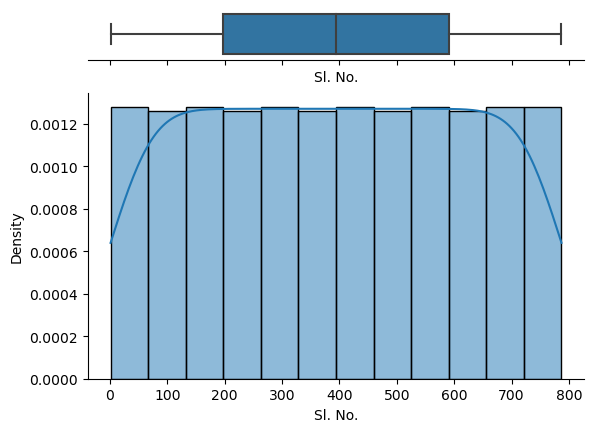

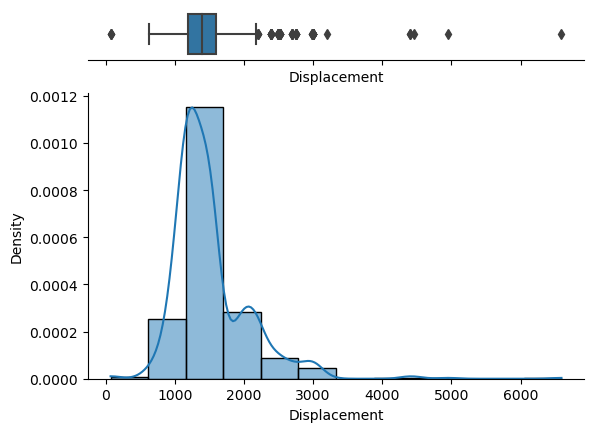

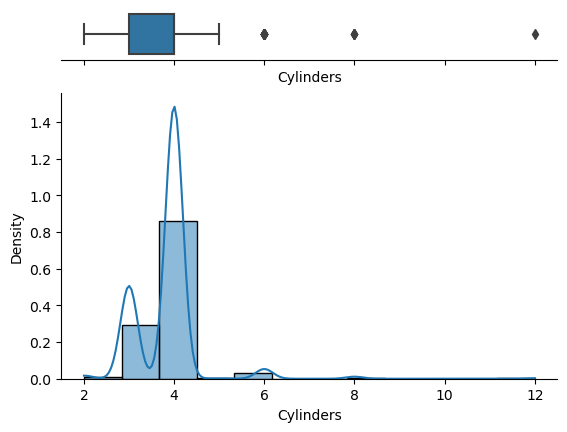

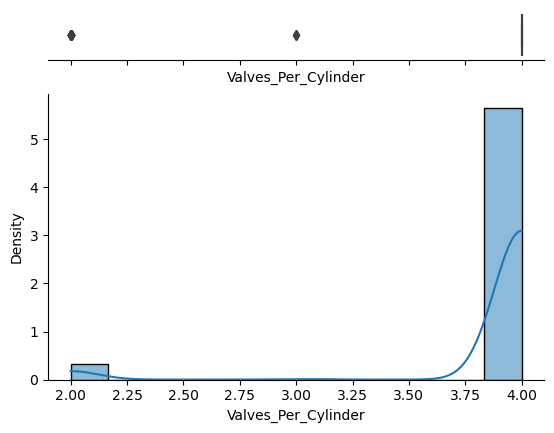

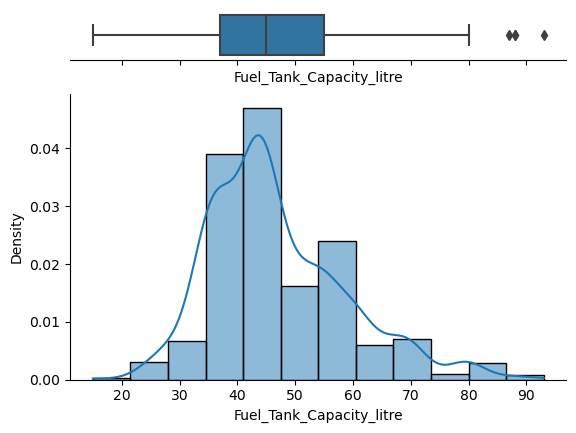

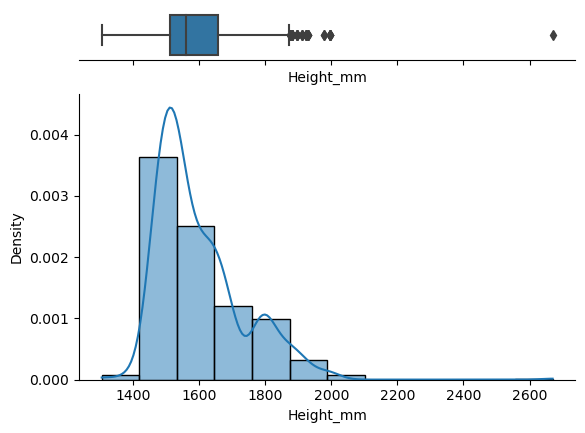

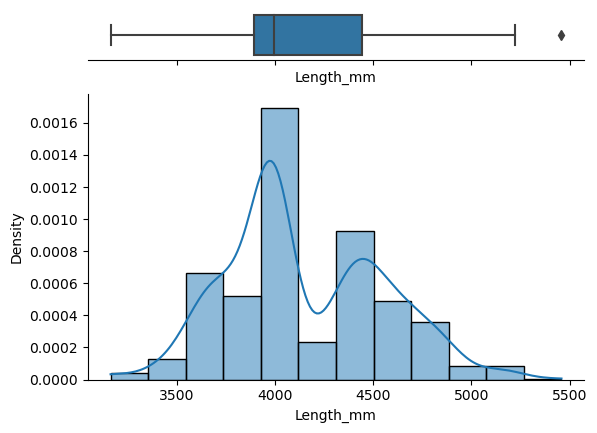

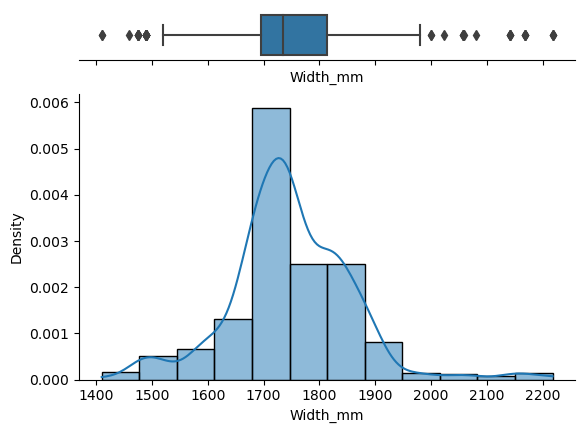

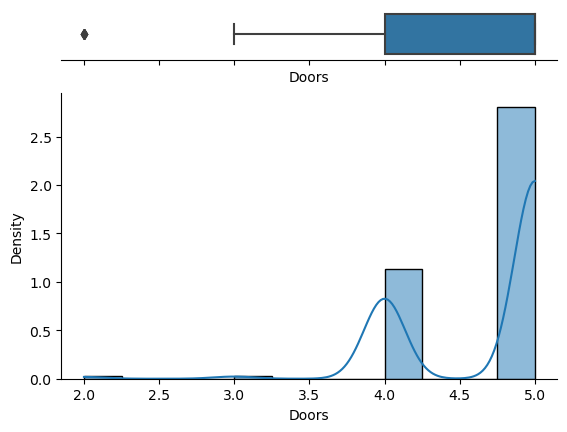

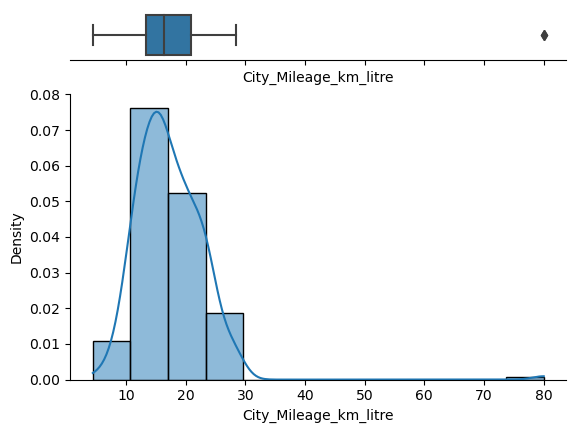

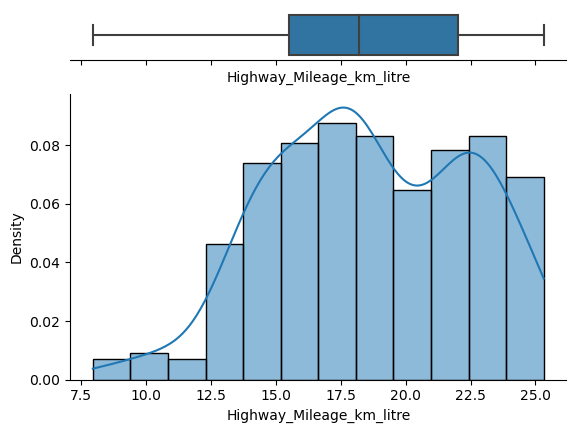

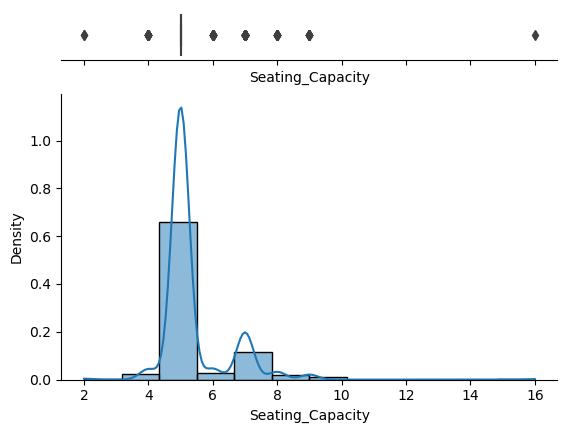

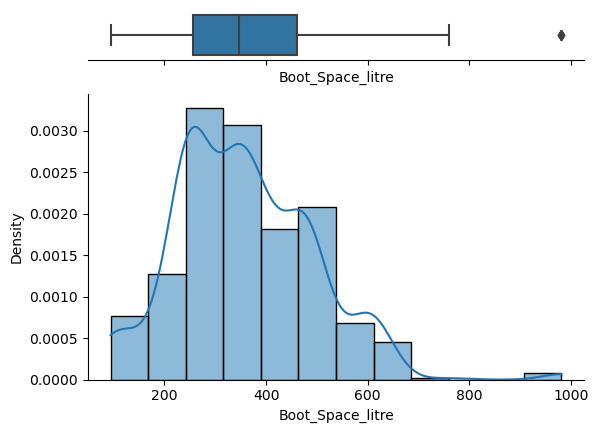

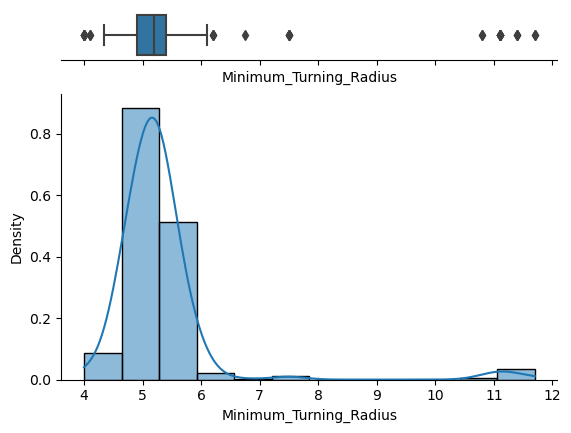

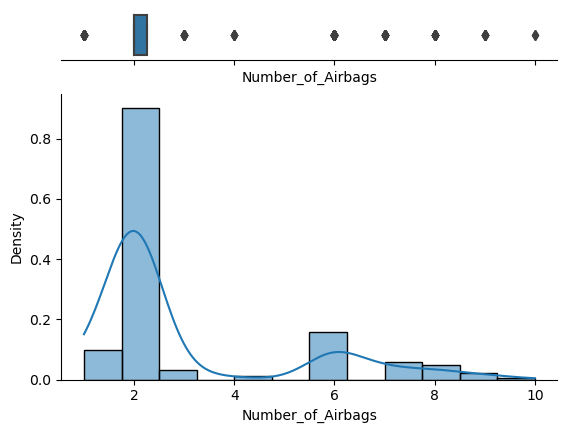

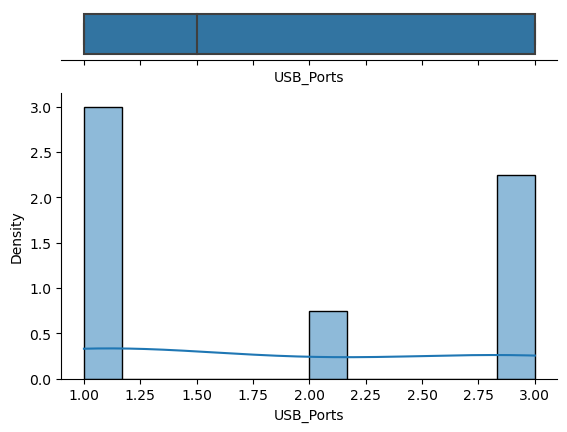

In [213]:
#6 Histogram & boxplots

for column in column_names_numeric:
   
    x = df[column]
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x=x, ax=ax_box)
    sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
    

In [214]:
#7 identify & capture outliers
for column in column_names_numeric:
    print(df[column].value_counts())

1      1
518    1
520    1
521    1
522    1
      ..
265    1
266    1
267    1
268    1
787    1
Name: Sl. No., Length: 787, dtype: int64
1197.0    108
1498.0     57
998.0      53
1248.0     47
2179.0     46
1497.0     38
1198.0     34
1461.0     21
1199.0     21
1968.0     20
999.0      18
1462.0     18
1364.0     17
1496.0     17
1493.0     17
1995.0     15
1194.0     13
1798.0     13
1396.0     13
1591.0     13
1598.0     12
796.0      12
2393.0     11
1582.0     11
2993.0     10
1999.0      8
1086.0      8
2523.0      8
1193.0      8
1186.0      7
2755.0      7
1956.0      6
624.0       6
1998.0      6
1196.0      6
2998.0      5
2694.0      5
1397.0      5
1120.0      5
799.0       4
1395.0      3
2498.0      3
72.0        3
4395.0      2
2157.0      2
2489.0      2
2198.0      2
1298.0      2
2979.0      2
3198.0      1
4461.0      1
6592.0      1
4951.0      1
1047.0      1
2200.0      1
2487.0      1
2982.0      1
Name: Displacement, dtype: int64
4.0     534
3.0     182
6.0  

In [215]:
pattern = re.compile("\d")

for name in column_names_object:
    result = False
    items = df[name].tolist()[0:10]
    
    for item in items :
        if pattern.match(str(item)) :
            result = True
            
    if result == True :
        print(name)
                           


ARAI_Certified_Mileage
ARAI_Certified_Mileage_for_CNG
Kerb_Weight
Gears
Ground_Clearance
Front_Track
Rear_Track
Front_Tyre_&_Rim
Rear_Tyre_&_Rim
Power
Torque
Wheelbase
Wheels_Size
Basic_Warranty
Extended_Warranty


In [216]:
df['ARAI_Certified_Mileage']

0      23.6 km/litre
1      23.6 km/litre
2                NaN
3      21.9 km/litre
4      23.6 km/litre
           ...      
782    15.1 km/litre
783    19.5 km/litre
784      21 km/litre
785      21 km/litre
786      21 km/litre
Name: ARAI_Certified_Mileage, Length: 787, dtype: object

In [217]:
def before_first_space_float(text) :
    x = re.findall('[^\s]+', text)
    if x :
        return(x.group())


In [218]:
#df['ARAI_Certified_Mileage_km/l'] = df['ARAI_Certified_Mileage'].apply(before_first_space_float)

In [219]:
df['ARAI_Certified_Mileage_km/l'] = df["ARAI_Certified_Mileage"].str.extract(r'([^\s]+)').astype('str')
df['ARAI_Certified_Mileage_km/l'] = df["ARAI_Certified_Mileage_km/l"].str.extract(r'([^-]+)').astype('float')
df['ARAI_Certified_Mileage_km/l']

0      23.6
1      23.6
2       NaN
3      21.9
4      23.6
       ... 
782    15.1
783    19.5
784    21.0
785    21.0
786    21.0
Name: ARAI_Certified_Mileage_km/l, Length: 787, dtype: float64

In [220]:
df['ARAI_Certified_Mileage_for_CNG'].value_counts()


25 km/kg       4
20 km/kg       2
30.48 km/kg    2
33.54 km/kg    2
36 km/kg       1
32.26 km/kg    1
31.76 km/kg    1
26.6 km/kg     1
20.5 km/kg     1
20.4 km/kg     1
31.79 km/kg    1
18.9 km/kg     1
Name: ARAI_Certified_Mileage_for_CNG, dtype: int64

In [221]:
df['ARAI_Certified_Mileage_for_CNG_km/kg'] = df["ARAI_Certified_Mileage"].str.extract(r'([^\s]+)').astype('str')
df['ARAI_Certified_Mileage_for_CNG_km/kg'] = df["ARAI_Certified_Mileage_for_CNG_km/kg"].str.extract(r'([^-]+)').astype('float')
df['ARAI_Certified_Mileage_for_CNG_km/kg']

0      23.6
1      23.6
2       NaN
3      21.9
4      23.6
       ... 
782    15.1
783    19.5
784    21.0
785    21.0
786    21.0
Name: ARAI_Certified_Mileage_for_CNG_km/kg, Length: 787, dtype: float64

In [224]:
df['Kerb_Weight_kg'] = df['Kerb_Weight'].str.extract(r'([^\s-]+)').astype('float')

In [225]:
df['Kerb_Weight_kg']

0       660.0
1       725.0
2       710.0
3       725.0
4       725.0
        ...  
782    1376.0
783    1395.0
784    1140.0
785    1140.0
786    1140.0
Name: Kerb_Weight_kg, Length: 787, dtype: float64

In [242]:
df['Gears'].value_counts()

5                              492
6                              157
7                               37
8                               35
4                               16
Single Speed Reduction Gear      1
Name: Gears, dtype: int64

In [241]:
df['Gears_N'] = df['Gears'].str.extract(r'(\d)').astype('float')
df['Gears_N'].value_counts()

Series([], Name: Gears_N, dtype: int64)
